<a href="https://colab.research.google.com/github/edwinmgallego/Best-README-Template/blob/main/An%C3%A1lisis_avanzado_de_series_temporales_y_datos_secuenciales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

¿Qué es una serie temporal?
Una serie temporal es un conjunto de datos ordenados en función del tiempo. Se usa en distintos campos como:
* ✅ Finanzas (precios de acciones).
* ✅ Clima (temperatura a lo largo del tiempo).
* ✅ Negocios (ventas mensuales).
* ✅ Salud (número de pacientes atendidos por día).


 Ejemplo de serie temporal:

* Fecha	      Valor
* 2023-01-01	150
*  2023-02-01	180
* 2023-03-01	170

* 1️⃣ Tendencia
*  Es la dirección general de los datos a lo largo del tiempo. Puede ser:
* 📈 Creciente (ejemplo: aumento de la población).
* 📉 Decreciente (ejemplo: ventas de un producto obsoleto).

2️⃣ Estacionalidad
Son patrones que se repiten en intervalos regulares. Por ejemplo:
🎄 Un aumento de ventas en diciembre (Navidad).
🏖 Mayor cantidad de turistas en verano.

3️⃣ Ruido (residuo)
Es la variabilidad aleatoria de los datos que no sigue ningún patrón claro.

📌 Ejemplo gráfico de estos componentes:


Serie original  → 🔵🔵🔵🔵 (suma de tendencia, estacionalidad y ruido)
Tendencia       → 📈📈📈📈
Estacionalidad  → 🔄🔄🔄🔄
Ruido           → 🎲🎲🎲🎲


3. Prueba de estacionariedad
* ¿Qué significa que una serie sea estacionaria?

Una serie es estacionaria si su media y varianza se mantienen constantes a lo largo del tiempo.

📌 Ejemplo de serie NO estacionaria:
El precio del dólar que sube con el tiempo.

📌 Ejemplo de serie estacionaria:
Diferencias de temperatura entre el día y la noche.

📌 Cómo hacer una serie estacionaria?
✅ Aplicar diferenciación (df.diff()).
✅ Tomar el logaritmo (np.log(df)).


 4. Modelado con ARIMA (AutoRegressive Integrated Moving Average)
¿Qué es ARIMA?
Es un modelo estadístico usado para predecir series temporales. Se compone de tres partes:

AR (Autoregressive): Usa valores pasados de la serie para hacer predicciones.
I (Integrated): Usa diferenciación para hacer la serie estacionaria.
MA (Moving Average): Usa los errores pasados para mejorar la predicción.
¿Cómo elegir los parámetros (p, d, q)?
p (autoregresión) → Número de valores pasados a considerar.
d (integración) → Número de diferenciaciones necesarias.
q (media móvil) → Número de errores pasados a considerar.

5. Redes Neuronales LSTM (Long Short-Term Memory)
¿Qué es LSTM?
LSTM es un tipo de red neuronal recurrente (RNN) diseñada para trabajar con datos secuenciales.

📌 ¿Por qué usar LSTM en series temporales?
✅ Aprende dependencias a largo plazo.
✅ Puede manejar datos no estacionarios.
✅ Es útil para predecir tendencias complejas.

¿Cómo funciona LSTM?
🔹 Cada celda LSTM tiene 3 puertas:

Puerta de entrada → Decide qué información guardar.
Puerta de olvido → Decide qué información descartar.
Puerta de salida → Produce la predicción.
📌 Ejemplo de aplicación de LSTM
📈 Predecir la demanda de energía eléctrica.

Conclusión

* ✅ Las series temporales son fundamentales en análisis de datos.
* ✅ ARIMA es una técnica estadística útil para datos estacionarios.
* ✅ LSTM es un enfoque basado en redes neuronales para patrones complejos.



 Carga y visualización de datos de series temporales
Antes de analizar una serie temporal, es crucial cargar y visualizar los datos.

📌 Código en Python (Google Colab)


            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


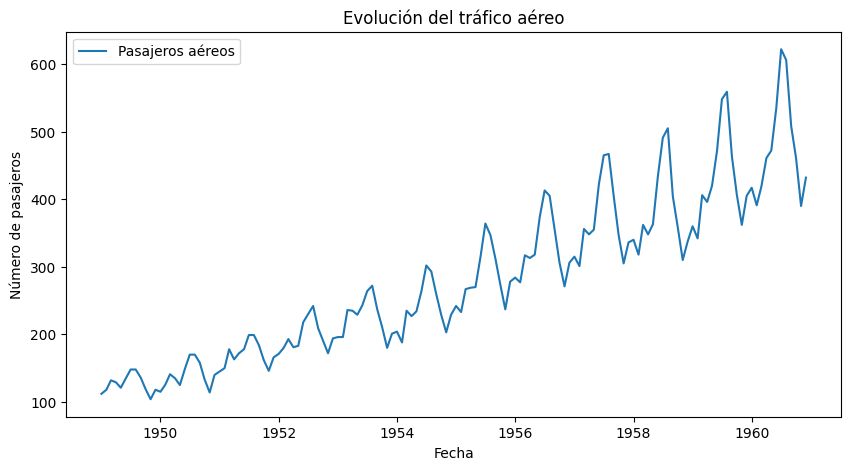

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos de ejemplo (usaremos un dataset de precios de acciones)
url = "/content/AirPassengers.csv"
df = pd.read_csv(url, parse_dates=["Month"], index_col="Month")

# Visualizar los primeros datos
print(df.head())

# Graficar la serie temporal
plt.figure(figsize=(10, 5))
plt.plot(df, label="Pasajeros aéreos")
plt.xlabel("Fecha")
plt.ylabel("Número de pasajeros")
plt.title("Evolución del tráfico aéreo")
plt.legend()
plt.show()


Ejercicio resuelto:
📌 Tarea: Cargar y visualizar una serie temporal de temperatura en una ciudad.
🔹 Solución:

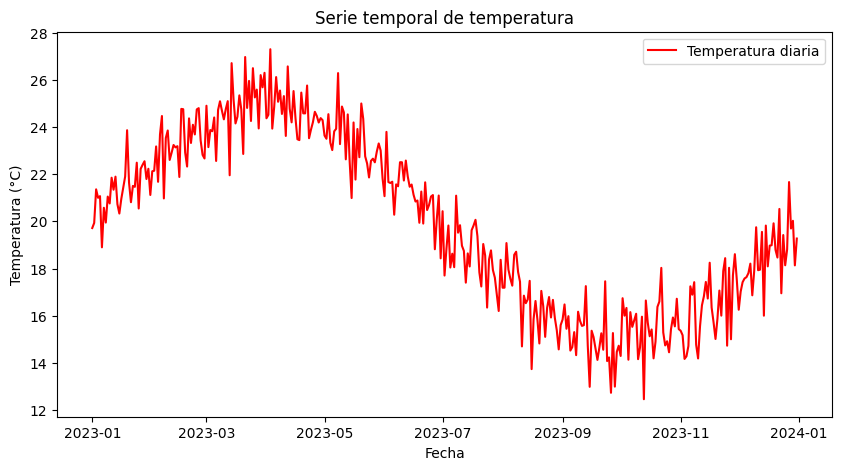

In [6]:
# Simulación de datos de temperatura
import numpy as np

fechas = pd.date_range(start="2023-01-01", periods=365, freq='D')
temperaturas = 20 + 5 * np.sin(2 * np.pi * fechas.dayofyear / 365) + np.random.randn(365)

df_temp = pd.DataFrame({"Fecha": fechas, "Temperatura": temperaturas})
df_temp.set_index("Fecha", inplace=True)

# Graficar la serie temporal
plt.figure(figsize=(10, 5))
plt.plot(df_temp, color="red", label="Temperatura diaria")
plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.title("Serie temporal de temperatura")
plt.legend()
plt.show()


Ejemplo 2: Descomposición de una serie temporal
Para analizar la tendencia, estacionalidad y ruido de una serie temporal.

📌 Código en Python

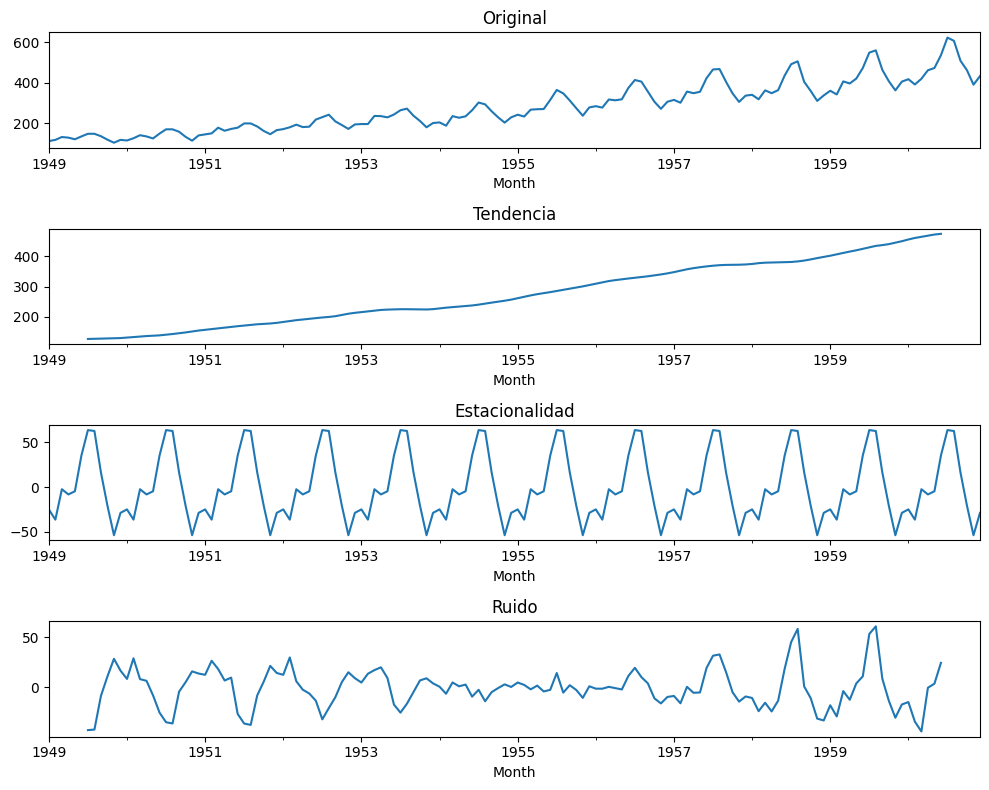

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición de la serie temporal
decomposition = seasonal_decompose(df, model="additive")

# Graficar los componentes
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
df.plot(ax=axes[0], title="Original", legend=False)
decomposition.trend.plot(ax=axes[1], title="Tendencia", legend=False)
decomposition.seasonal.plot(ax=axes[2], title="Estacionalidad", legend=False)
decomposition.resid.plot(ax=axes[3], title="Ruido", legend=False)
plt.tight_layout()
plt.show()


Ejercicio:
📌 Tarea: Aplicar la descomposición a otra serie temporal, por ejemplo, datos de temperatura.




In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Crear y entrenar el modelo ARIMA (orden ARIMA(p,d,q))
model = ARIMA(df, order=(2,1,2))
model_fit = model.fit()

# Hacer predicciones
pred = model_fit.forecast(steps=12)

# Graficar predicción
plt.figure(figsize=(10, 5))
plt.plot(df, label="Datos reales")
plt.plot(pd.date_range(start=df.index[-1], periods=12, freq='M'), pred, color="red", label="Predicción")
plt.xlabel("Fecha")
plt.ylabel("Pasajeros")
plt.legend()
plt.show()


✅ Ejercicio:
📌 Tarea: Ajustar un modelo ARIMA para predecir temperaturas.

Ejemplo 4: Predicción con LSTM (Deep Learning)
Para modelos más avanzados, usamos redes neuronales recurrentes como LSTM.

📌 Código en Python

In [8]:
#Aquí importamos:

#TensorFlow: Librería para construir modelos de aprendizaje profundo.
#Keras: API de alto nivel dentro de TensorFlow para construir redes neuronales.
#Sequential: Tipo de modelo de Keras donde las capas se apilan secuencialmente.
#LSTM: Capa de red neuronal recurrente especializada en series temporales.
#Dense: Capa completamente conectada (totalmente conectada) que produce la salida.
#NumPy: Librería para manejar arreglos numéricos en Python.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Preprocesamiento
#Aquí asumimos que df es un DataFrame de pandas. Luego, se
#normalizan los datos usando la media y la desviación estándar:
data = df.values
data = (data - np.mean(data)) / np.std(data)  # Normalización


#Aquí creamos las secuencias para entrenar el modelo.

#📌 Ejemplo de cómo funciona este proceso
#Si data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
#se formarían las siguientes secuencias:

#Entrada (X)	                     Salida (y)
#[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]	   11
#[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]	 12
X, y = [], []
for i in range(len(data) - 10):
    X.append(data[i:i+10])
    y.append(data[i+10])

X, y = np.array(X), np.array(y)

# Construcción del modelo LSTM

# Explicación del modelo

#Sequential(...) → Define una arquitectura de red neuronal en la que las capas se apilan secuencialmente.
#LSTM(50, activation="relu", return_sequences=True, input_shape=(10,1))
#50 → Número de neuronas en la capa LSTM.
#activation="relu" → Función de activación (ReLU).
#return_sequences=True → Mantiene la salida secuencial (porque tenemos otra capa LSTM después).
#input_shape=(10,1) → La entrada es de forma (10,1), es decir, 10 pasos en el tiempo con una característica por cada paso.
#LSTM(50, activation="relu") → Segunda capa LSTM, sin return_sequences, lo que significa que devuelve una sola salida.
#Dense(1) → Capa de salida con una sola neurona, que predice un único valor.
model = Sequential([
    LSTM(50, activation="relu", return_sequences=True, input_shape=(10,1)),
    LSTM(50, activation="relu"),
    Dense(1)
])
#5️⃣ Compilación del modelo
# Explicación:
#optimizer="adam" → Optimizador Adam, una variante del gradiente descendente.
model.compile(optimizer="adam", loss="mse")

# Entrenamiento
 #Entrenamiento del modelo
# Explicación

#X, y → Datos de entrenamiento.
#epochs=20 → Entrena el modelo por 20 iteraciones sobre los datos.
#verbose=1 → Muestra el progreso del entrenamiento en consola.

model.fit(X, y, epochs=20, verbose=1)

# Predicción
 #Explicación

#X[-1] → Toma la última secuencia de entrada.
#.reshape(1, 10, 1) → Redimensiona los datos para que el modelo los acepte.
#model.predict(...) → Realiza la predicción del próximo valor.
pred = model.predict(X[-1].reshape(1, 10, 1))
print("Predicción:", pred)
#Si la serie es [1, 2, 3, ..., 12], el modelo predice un valor cercano a 13.


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.8725
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9201
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7382
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5284
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3410
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2978
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2649
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2453
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2317
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2358
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2245
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2363
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2280
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2142
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1839
Epoch 16/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/

🎯 Resumen final
✅ Se preprocesan los datos normalizándolos.
✅ Se crean secuencias de entrada (X) y salida (y).
✅ Se construye un modelo LSTM con dos capas y una capa densa.
✅ Se entrena el modelo con los datos de la serie temporal.
✅ Se usa el modelo para predecir el siguiente valor.


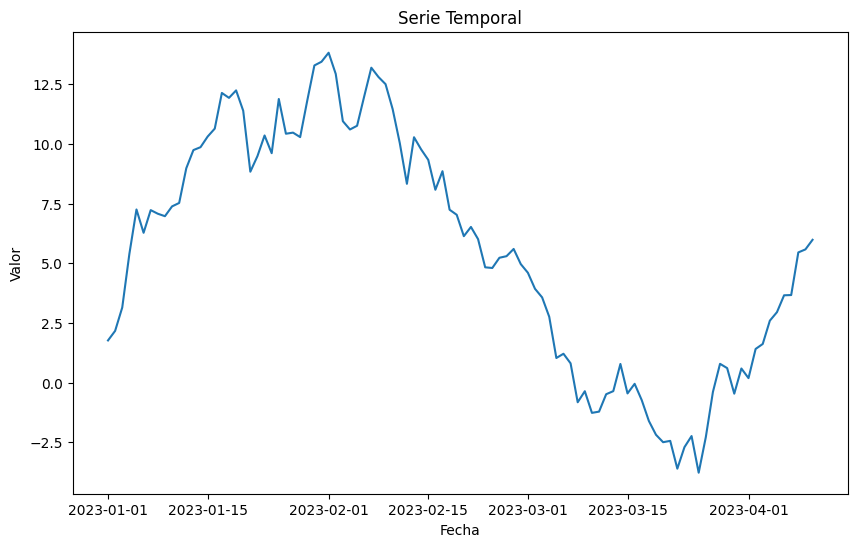

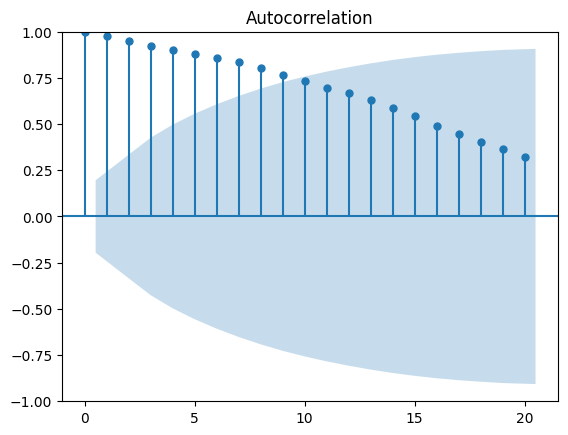

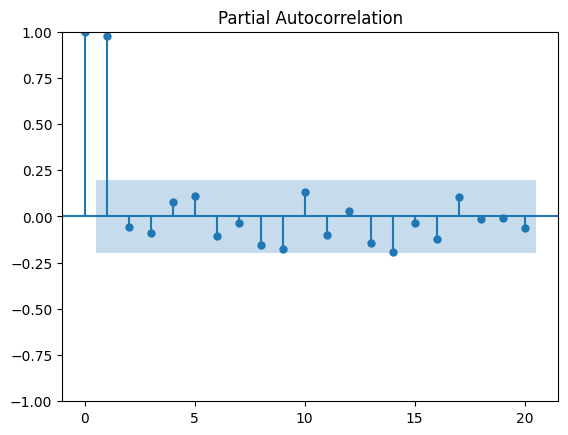

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

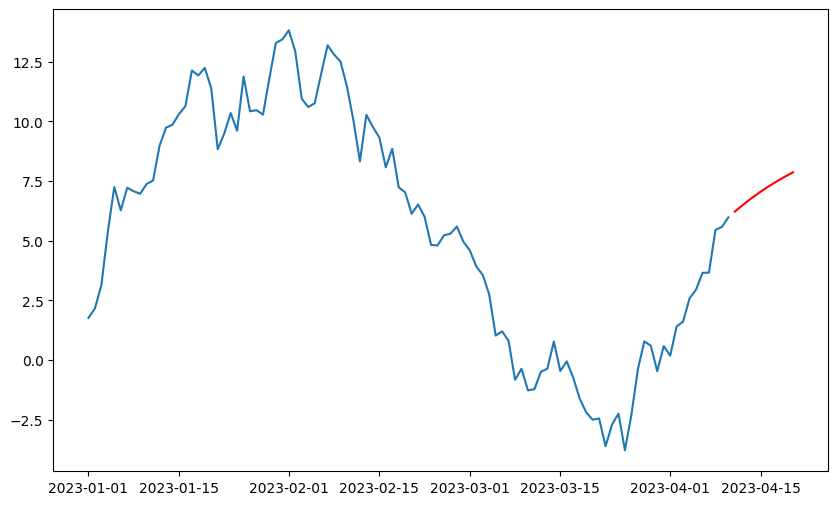

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Generar datos de ejemplo
np.random.seed(0)
n = 100
time = pd.date_range(start='2023-01-01', periods=n, freq='D')
data = np.cumsum(np.random.randn(n))  # Serie temporal con tendencia

# Visualizar la serie temporal
plt.figure(figsize=(10, 6))
plt.plot(time, data)
plt.title('Serie Temporal')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.show()


# ACF y PACF para identificar parámetros de ARIMA
plot_acf(data, lags=20)
plot_pacf(data, lags=20)
plt.show()


# Ajustar modelo ARIMA
model = ARIMA(data, order=(1, 1, 1))  # (p, d, q)
results = model.fit()


# Predicción
forecast = results.get_forecast(steps=10)
predicted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()


# Visualizar predicción
plt.figure(figsize=(10, 6))
plt.plot(time, data, label='Datos reales')
plt.plot(pd.date_range(start=time[-1], periods=11, freq='D')[1:], predicted_values, label='Predicción', color='red')
plt.fill_between(pd.date_range(start=time[-1], periods=11, freq='D')[1:],confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Predicción con ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

2. Predicción con LSTM (Red Neuronal Recurrente)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.4411
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3603
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3380
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2842 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2344
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2200 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1782
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1531
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1023
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0659
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0395
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0296
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0356
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0371
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0272
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18m

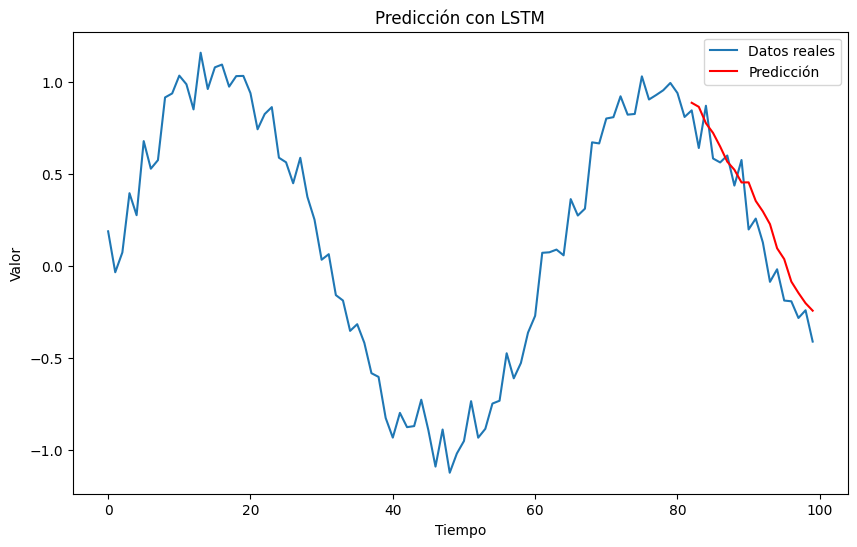

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler


# Generar datos de ejemplo
n = 100
data = np.sin(np.linspace(0, 10, n)) + np.random.normal(0, 0.1, n)


# Normalizar datos
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.reshape(-1, 1))


# Preparar datos para LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
         X.append(data[i:i+seq_length])
         y.append(data[i+seq_length])
    return np.array(X), np.array(y)


seq_length = 10
X, y = create_sequences(data_scaled, seq_length)


# Dividir en entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


# Construir modelo LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


# Entrenar modelo
model.fit(X_train, y_train, epochs=50, verbose=1)


# Predicción
y_pred = model.predict(X_test)


# Desnormalizar datos
y_test_actual = scaler.inverse_transform(y_test)
y_pred_actual = scaler.inverse_transform(y_pred)


# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(data)), scaler.inverse_transform(data_scaled), label='Datos reales')
plt.plot(np.arange(train_size + seq_length, len(data)), y_pred_actual, label='Predicción', color='red')
plt.title('Predicción con LSTM')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()



3. Uso de Prophet para series temporales

In [ ]:
from fbprophet import Prophet
import pandas as pd


# Generar datos de ejemplo
n = 100
time = pd.date_range(start='2023-01-01', periods=n, freq='D')
data = pd.DataFrame({'ds': time, 'y': np.sin(np.linspace(0, 10, n)) + np.random.normal(0, 0.1, n)})


# Ajustar modelo Prophet
model = Prophet()
model.fit(data)


# Predicción
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
# Visualizar resultados
model.plot(forecast)
plt.title('Predicción con Prophet')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.show()